In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [31]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d681df1da940cea4635a4e57b306c7e9


In [32]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

new norfolk au
hamilton bm
puerto ayora ec
omsukchan ru
zurrieq mt
krasnoselkup ru
mys shmidta ru
ushuaia ar
rikitea pf
hermanus za
busselton au
cape town za
kassala sd
rikitea pf
tobetsu jp
bengkulu id
dikson ru
longyearbyen sj
barentsburg sj
marcona pe
saleaula ws
vaini to
tiznit ma
illoqqortoormiut gl
porto novo cv
thompson ca
ushuaia ar
illoqqortoormiut gl
terme tr
ust-kamchatsk ru
busselton au
ushuaia ar
tuktoyaktuk ca
emba kz
illoqqortoormiut gl
sept-iles ca
mar del plata ar
tuktoyaktuk ca
mar del plata ar
luanda ao
tenenkou ml
rikitea pf
katsuura jp
santa lucia pe
bolungarvik is
beloha mg
mys shmidta ru
athabasca ca
jamestown us
faanui pf
rikitea pf
almeirim br
qaanaaq gl
yellowknife ca
attawapiskat ca
kodiak us
san policarpo ph
abalak ne
karratha au
hermanus za
tongzi cn
bambous virieux mu
shache cn
carnarvon au
grimstad no
grand gaube mu
norman wells ca
hermanus za
tezu in
mataura pf
hermanus za
palmer us
kodiak us
bengkulu id
dikson ru
cayenne gf
albany au
new norfolk au
sain

rikitea pf
taolanaro mg
samarai pg
quatre cocos mu
nanortalik gl
hermanus za
da nang vn
taolanaro mg
aflu dz
mar del plata ar
cayenne gf
marion us
dikson ru
yellowknife ca
rikitea pf
touros br
sentyabrskiy ru
port alfred za
rikitea pf
dalvik is
taolanaro mg
mehamn no
butaritari ki
mataura pf
atuona pf
waipawa nz
rikitea pf
hofn is
tiksi ru
lasa cn
chokurdakh ru
borama so
ushuaia ar
taos us
port elizabeth za
grand river south east mu
busselton au
mar del plata ar
aklavik ca
yulara au
new norfolk au
victoria sc
khvorostyanka ru
san isidro ph
sterling us
ushuaia ar
ushuaia ar
yellowknife ca
georgetown sh
chokurdakh ru
port alfred za
laguna br
kavieng pg
tual id
najran sa
vanimo pg
bambous virieux mu
gat ly
filingue ne
mar del plata ar
provideniya ru
ushuaia ar
punta arenas cl
carnarvon au
ushuaia ar
atar mr
airai pw
albany au
ushuaia ar
port jervis us
te anau nz
rikitea pf
iqaluit ca
amderma ru
kodiak us
tasiilaq gl
atuona pf
djambala cg
quatre cocos mu
itaituba br
ushuaia ar
upernavik gl

In [36]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [34]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [35]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [37]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [40]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 12 of Set 25 | new norfolk
Processing Record 13 of Set 25 | hamilton
Processing Record 14 of Set 25 | puerto ayora
Processing Record 15 of Set 25 | omsukchan
Processing Record 16 of Set 25 | zurrieq
Processing Record 17 of Set 25 | krasnoselkup
Processing Record 18 of Set 25 | mys shmidta
City not found. Skipping...
Processing Record 19 of Set 25 | ushuaia
Processing Record 20 of Set 25 | rikitea
Processing Record 21 of Set 25 | hermanus
Processing Record 22 of Set 25 | busselton
Processing Record 23 of Set 25 | cape town
Processing Record 24 of Set 25 | kassala
Processing Record 25 of Set 25 | tobetsu
Processing Record 26 of Set 25 | bengkulu
Processing Record 27 of Set 25 | dikson
Processing Record 28 of Set 25 | longyearbyen
Processing Record 29 of Set 25 | barentsburg
City not found. Skipping...
Processing Record 30 of Set 25 | marcona
City not found. Skipping...
Processing Record 31 of Set 25 | saleaula
City not found. Skipping...
Processing Record 32 of Set 25 |

Processing Record 38 of Set 28 | arucas
Processing Record 39 of Set 28 | souillac
Processing Record 40 of Set 28 | nadym
Processing Record 41 of Set 28 | markova
Processing Record 42 of Set 28 | lima
Processing Record 43 of Set 28 | umzimvubu
City not found. Skipping...
Processing Record 44 of Set 28 | hithadhoo
Processing Record 45 of Set 28 | sao filipe
Processing Record 46 of Set 28 | bela vista
Processing Record 47 of Set 28 | tilichiki
Processing Record 48 of Set 28 | luwingu
Processing Record 49 of Set 28 | kavaratti
Processing Record 50 of Set 28 | strezhevoy
Processing Record 1 of Set 29 | monchegorsk
Processing Record 2 of Set 29 | sinjar
Processing Record 3 of Set 29 | starobaltachevo
Processing Record 4 of Set 29 | tuni
Processing Record 5 of Set 29 | tura
Processing Record 6 of Set 29 | mastic beach
Processing Record 7 of Set 29 | churapcha
Processing Record 8 of Set 29 | sinjai
Processing Record 9 of Set 29 | cartagena del chaira
Processing Record 10 of Set 29 | belushya g

Processing Record 24 of Set 32 | tucuman
Processing Record 25 of Set 32 | ternate
Processing Record 26 of Set 32 | hami
Processing Record 27 of Set 32 | borama
City not found. Skipping...
Processing Record 28 of Set 32 | dalvik
Processing Record 29 of Set 32 | springfield
Processing Record 30 of Set 32 | slave lake
Processing Record 31 of Set 32 | lang son
Processing Record 32 of Set 32 | mogadishu
Processing Record 33 of Set 32 | vardo
Processing Record 34 of Set 32 | samusu
City not found. Skipping...
Processing Record 35 of Set 32 | sentyabrskiy
City not found. Skipping...
Processing Record 36 of Set 32 | vyazemskiy
Processing Record 37 of Set 32 | samarai
Processing Record 38 of Set 32 | quatre cocos
Processing Record 39 of Set 32 | da nang
Processing Record 40 of Set 32 | aflu
City not found. Skipping...
Processing Record 41 of Set 32 | marion
Processing Record 42 of Set 32 | touros
Processing Record 43 of Set 32 | waipawa
Processing Record 44 of Set 32 | taos
Processing Record 45

Processing Record 7 of Set 36 | ayr
Processing Record 8 of Set 36 | cedar city
Processing Record 9 of Set 36 | adrar
Processing Record 10 of Set 36 | pokhara
Processing Record 11 of Set 36 | lhokseumawe
Processing Record 12 of Set 36 | blackwater
Processing Record 13 of Set 36 | salinopolis
Processing Record 14 of Set 36 | saurimo
Processing Record 15 of Set 36 | micheweni
Processing Record 16 of Set 36 | krasnooktyabrskiy
Processing Record 17 of Set 36 | urfa
City not found. Skipping...
Processing Record 18 of Set 36 | kampong thum
Processing Record 19 of Set 36 | neiafu
Processing Record 20 of Set 36 | griffith
Processing Record 21 of Set 36 | stokmarknes
Processing Record 22 of Set 36 | norfolk
Processing Record 23 of Set 36 | portales
Processing Record 24 of Set 36 | taunggyi
Processing Record 25 of Set 36 | harper
Processing Record 26 of Set 36 | lagoa
Processing Record 27 of Set 36 | tungkang
City not found. Skipping...
Processing Record 28 of Set 36 | taburi
City not found. Skip

In [41]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Izmit,40.77,29.92,57.20,100,0,2.91,TR,2020-08-21 00:47:27
1,New Norfolk,-42.78,147.06,48.00,80,96,1.01,AU,2020-08-21 00:48:03
2,Hamilton,39.18,-84.53,75.20,60,1,3.36,US,2020-08-21 00:44:53
3,Puerto Ayora,-0.74,-90.35,66.00,89,65,7.00,EC,2020-08-21 00:48:03
4,Omsukchan,62.53,155.80,45.73,86,100,7.87,RU,2020-08-21 00:48:03
5,Zurrieq,35.83,14.47,79.00,88,0,1.12,MT,2020-08-21 00:48:03
6,Krasnoselkup,65.70,82.47,56.98,87,0,8.93,RU,2020-08-21 00:43:52
7,Ushuaia,-54.80,-68.30,42.80,75,40,13.87,AR,2020-08-21 00:48:04
8,Rikitea,-23.12,-134.97,66.76,80,100,26.35,PF,2020-08-21 00:48:04
9,Hermanus,-34.42,19.23,46.99,96,0,6.85,ZA,2020-08-21 00:48:04


In [42]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Izmit,TR,2020-08-21 00:47:27,40.77,29.92,57.20,100,0,2.91
1,New Norfolk,AU,2020-08-21 00:48:03,-42.78,147.06,48.00,80,96,1.01
2,Hamilton,US,2020-08-21 00:44:53,39.18,-84.53,75.20,60,1,3.36
3,Puerto Ayora,EC,2020-08-21 00:48:03,-0.74,-90.35,66.00,89,65,7.00
4,Omsukchan,RU,2020-08-21 00:48:03,62.53,155.80,45.73,86,100,7.87
...,...,...,...,...,...,...,...,...,...
552,Barillas,GT,2020-08-21 00:49:04,15.80,-91.32,63.27,92,99,2.28
553,Svetlyy,RU,2020-08-21 00:49:04,54.67,20.13,64.40,93,75,6.71
554,Nalut,LY,2020-08-21 00:49:04,30.33,10.85,82.00,31,0,13.22
555,Aktau,KZ,2020-08-21 00:49:04,43.65,51.20,69.80,43,0,11.18


In [44]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [45]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [46]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1597977106.8101

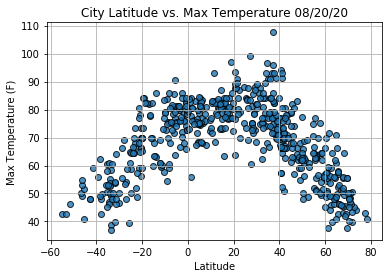

In [47]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

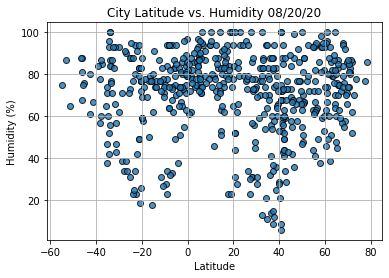

In [48]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

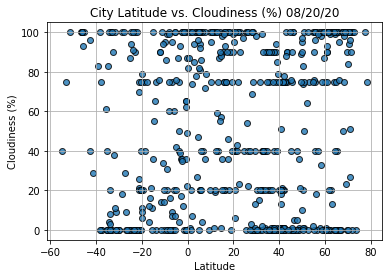

In [49]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

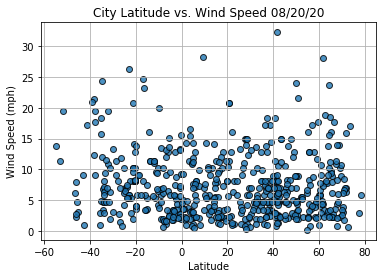

In [50]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [109]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [77]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [55]:
index13 = city_data_df.loc[13]
index13

City                      Tobetsu
Country                        JP
Date          2020-08-21 00:48:04
Lat                         43.22
Lng                        141.52
Max Temp                    71.01
Humidity                       77
Cloudiness                     75
Wind Speed                   6.93
Name: 13, dtype: object

In [56]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Izmit,TR,2020-08-21 00:47:27,40.77,29.92,57.20,100,0,2.91
2,Hamilton,US,2020-08-21 00:44:53,39.18,-84.53,75.20,60,1,3.36
4,Omsukchan,RU,2020-08-21 00:48:03,62.53,155.80,45.73,86,100,7.87
5,Zurrieq,MT,2020-08-21 00:48:03,35.83,14.47,79.00,88,0,1.12
6,Krasnoselkup,RU,2020-08-21 00:43:52,65.70,82.47,56.98,87,0,8.93
...,...,...,...,...,...,...,...,...,...
552,Barillas,GT,2020-08-21 00:49:04,15.80,-91.32,63.27,92,99,2.28
553,Svetlyy,RU,2020-08-21 00:49:04,54.67,20.13,64.40,93,75,6.71
554,Nalut,LY,2020-08-21 00:49:04,30.33,10.85,82.00,31,0,13.22
555,Aktau,KZ,2020-08-21 00:49:04,43.65,51.20,69.80,43,0,11.18


In [67]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

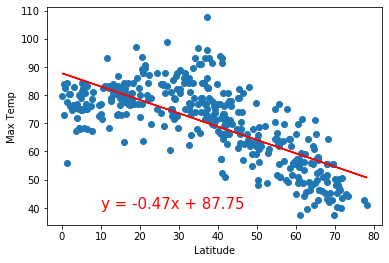

In [112]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

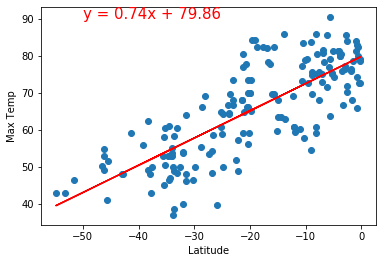

In [117]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

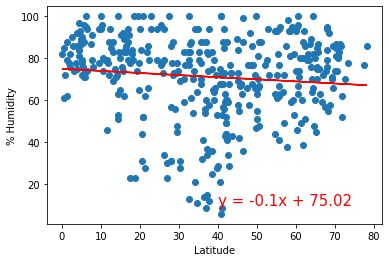

In [120]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

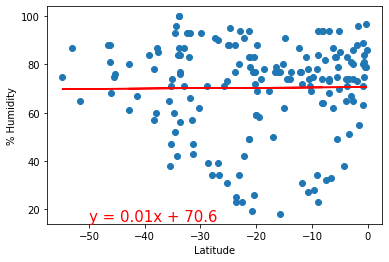

In [122]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

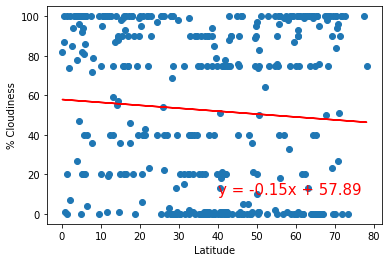

In [131]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

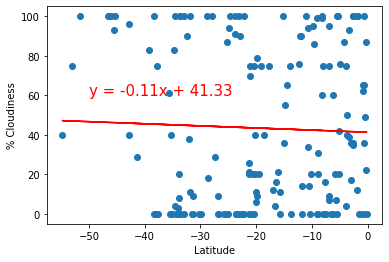

In [130]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

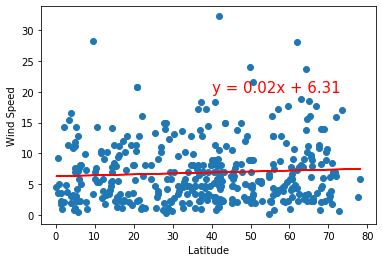

In [137]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,20))

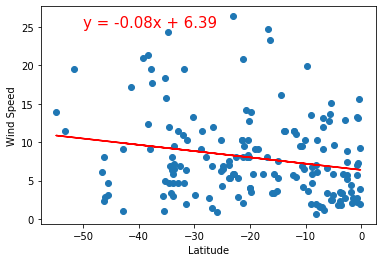

In [139]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))